In [1]:
import lightgbm as lgb
import xgboost as xgb

import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as s

In [32]:
# Define the dataset

In [35]:
X = np.arange(0,5,0.0001)
Y = X**2 

X = X.reshape(-1,1)
print(f"Dataset size: {X.shape[0]}")

Dataset size: 50000


Text(0, 0.5, 'Target Y')

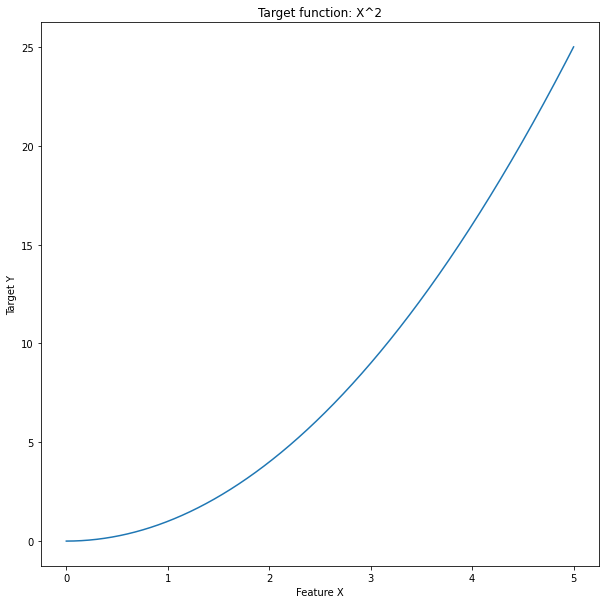

In [36]:
plt.figure(figsize=(10,10))
plt.plot(X[:,0],Y)
plt.title('Target function: X^2')
plt.xlabel('Feature X')
plt.ylabel('Target Y')

In [37]:
booster_model = xgb.XGBRegressor(learning_rate=0.01,n_estimators=1000)
booster_model.fit(X, Y)

rf_model = lgb.LGBMRegressor(learning_rate=0.001,boosting_type='rf',n_estimators=1000,bagging_fraction=0.01,bagging_freq=1,num_leaves=17,objective='MSE')#**params)#n_estimators=1000)
rf_model.fit(X,Y)

[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] bagging_fraction is set=0.01, subsample=1.0 will be ignored. Current value: bagging_fraction=0.01


LGBMRegressor(bagging_fraction=0.01, bagging_freq=1, boosting_type='rf',
              learning_rate=0.001, n_estimators=1000, num_leaves=17,
              objective='MSE')

# Gradient boosting model

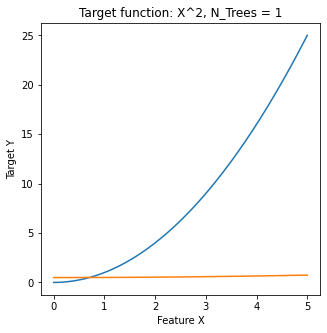

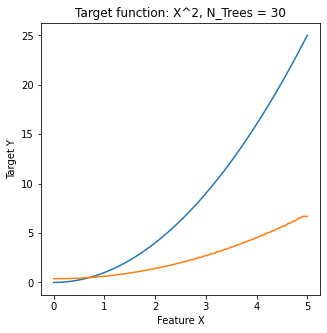

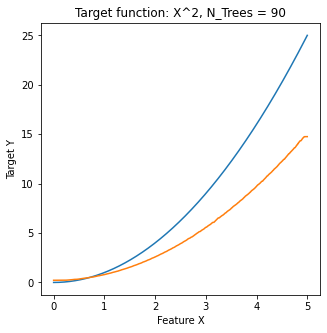

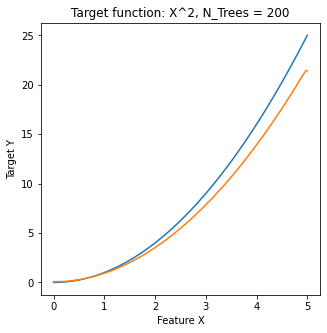

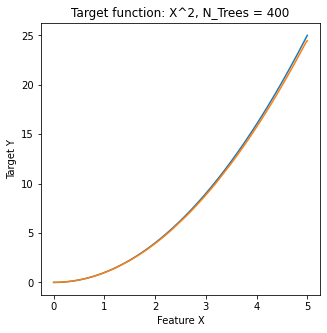

In [38]:
n_trees = [1,30,90,200,400]

for n in n_trees:

    pred = booster_model.predict(X,iteration_range=(0, n))


    plt.figure(figsize=(5,5))
    plt.plot(X[:,0],Y)
    plt.plot(X[:,0],pred)
    plt.title(f'Target function: X^2, N_Trees = {n}')
    plt.xlabel('Feature X')
    plt.ylabel('Target Y')

# Random forest model

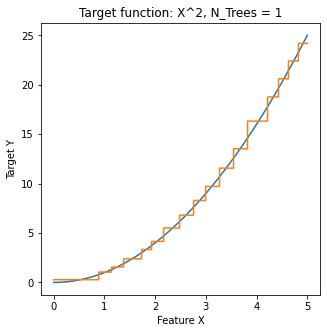

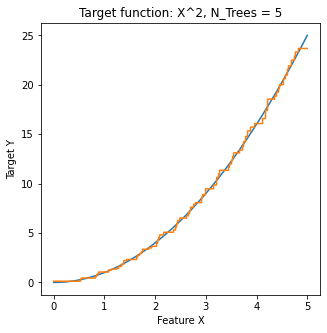

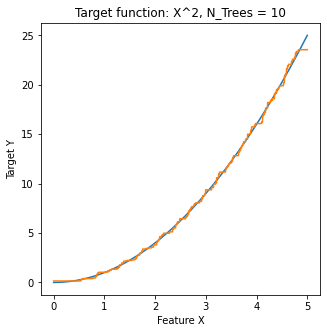

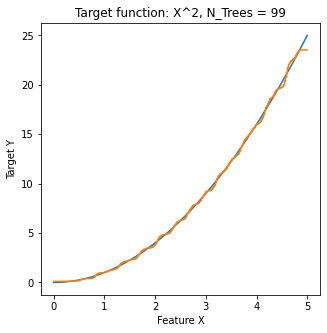

In [39]:
n_trees = [1,5,10,99]

for n in n_trees:

    pred = rf_model.predict(X,num_iteration=n)


    plt.figure(figsize=(5,5))
    plt.plot(X[:,0],Y)
    plt.plot(X[:,0],pred)
    plt.title(f'Target function: X^2, N_Trees = {n}')
    plt.xlabel('Feature X')
    plt.ylabel('Target Y')